# Web Data
In this notebook we will get our hand dirty with some topics of web data feature handling like IP addresses, User agents, etc...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

In [2]:
df = pd.read_csv('../dastasets/Ecommerce Purchases.csv')
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


### Get Browser, OS and Device Info from User Agent
you can use this library to extract information from User Agent Data
https://github.com/selwin/python-user-agents

In [4]:
import user_agents

ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'
# ua = 'Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9B179 Safari/7534.48.3'
# ua = 'BlackBerry9700/5.0.0.862 Profile/MIDP-2.1 Configuration/CLDC-1.1 VendorID/331 UNTRUSTED/1.0 3gpp-gba'
# ua = 'Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30'
# ua = 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_3; en-us; Silk/1.1.0-80) AppleWebKit/533.16 (KHTML, like Gecko) Version/5.0 Safari/533.16 Silk-Accelerated=true'

ua = user_agents.parse(ua)

print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('Is Tablet? ',ua.is_tablet)
print('Is Touch Capable? ',ua.is_touch_capable)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)
print('Device Family: ',ua.device.family)
print('Device Brand: ',ua.device.brand)
print('Device Model: ',ua.device.model)

Is a bot?  False
Is mobile?  False
Is PC?  True
Is Tablet?  False
Is Touch Capable?  False
OS Family:  Windows
OS Version:  (10,)
Browser Family:  Chrome
Browser Version:  (90, 0, 4430)
Device Family:  Other
Device Brand:  None
Device Model:  None


## Ok let's implement it on our data

In [5]:
def extract_brwoser(ua):
    ua = user_agents.parse(ua)
    return ua.browser.family

def extract_os(ua):
    ua = user_agents.parse(ua)
    return ua.os.family

def extract_device(ua):
    ua = user_agents.parse(ua)
    return ua.device.family


df['OS'] = df['Browser Info'].apply(extract_os)
df['Browser'] = df['Browser Info'].apply(extract_brwoser)
df['Device'] = df['Browser Info'].apply(extract_device)

In [6]:
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21,Windows,Chrome,Other
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,Windows,IE,Other
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98,Mac OS X,Safari,Mac
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84,Mac OS X,Firefox,Mac


or u can use this method for better code

In [7]:
def extract_web_data(ua):
    ua = user_agents.parse(ua)
    return pd.Series((ua.os.family, ua.browser.family, ua.device.family))

df[['OS', 'Browser', 'Device']] = df['Browser Info'].apply(extract_web_data)

df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other


<AxesSubplot:xlabel='OS', ylabel='count'>

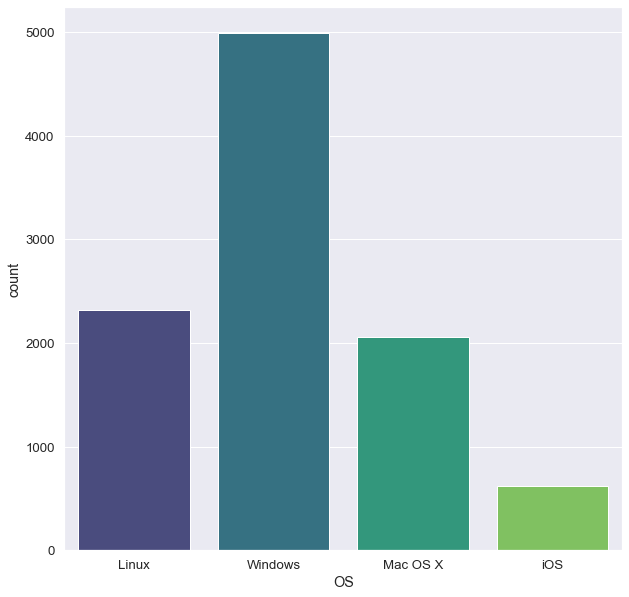

In [8]:
sns.countplot(x='OS', data=df, palette='viridis')

<AxesSubplot:xlabel='Browser', ylabel='count'>

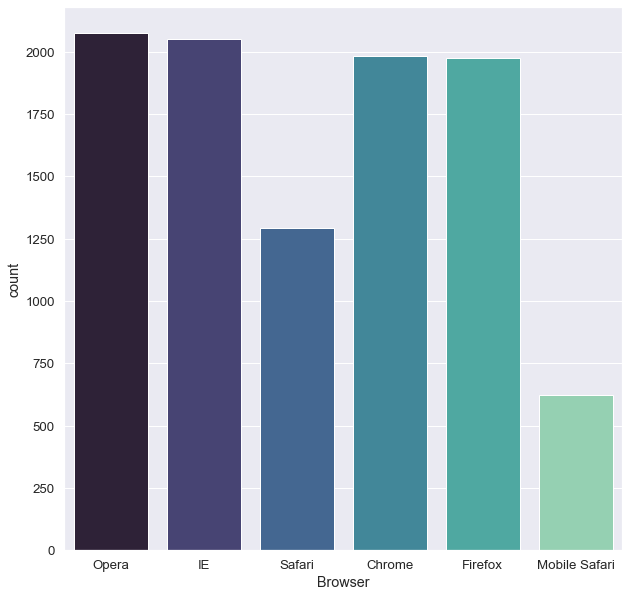

In [9]:
sns.countplot(x='Browser', data=df, palette='mako')

<AxesSubplot:xlabel='Device', ylabel='count'>

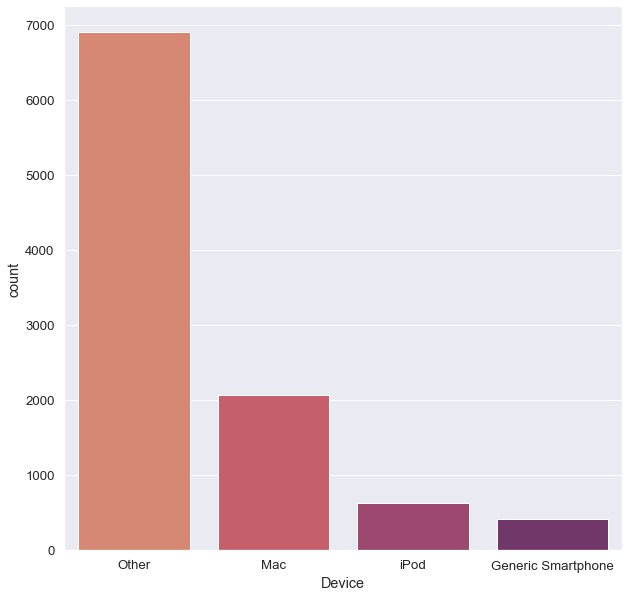

In [10]:
sns.countplot(x='Device', data=df, palette='flare')

### Get Location from IP address
you can use this library to extract location information from IP address
https://github.com/tomas-net/ip2geotools

In [11]:
df = df.head(100)
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"4445 Christopher Well Apt. 053\nRonaldton, KS ...",33 Uu,PM,Opera/9.21.(Windows NT 6.1; sl-SI) Presto/2.9....,Moore-Hall,3088798824982514,04/18,928,JCB 16 digit,arellanopatrick@thomas.net,Dealer,59.216.3.55,fr,19.56,Windows,Opera,Other
96,"17923 Carol Lake Suite 232\nNew Andre, MD 0577...",20 bk,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,Knight LLC,60498172646,09/25,600,Voyager,mannlisa@yahoo.com,Town planner,200.220.84.25,fr,77.51,Mac OS X,Safari,Mac
97,"91474 Craig Brooks Suite 633\nNew Patrick, CT ...",42 Nk,AM,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...,"Parker, Nelson and Delgado",3528362130154694,02/25,366,Mastercard,crawfordwilliam@yahoo.com,Travel agency manager,126.124.175.181,ru,17.20,Linux,Firefox,Other
98,"192 Malone Stream Suite 756\nLake Gary, KS 373...",00 zU,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Simpson Inc,376660848256225,08/23,215,American Express,jeanetteburgess@hotmail.com,"Engineer, water",177.234.46.245,fr,38.75,Windows,IE,Other


In [12]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo


response = ip2geo.get('45.243.72.231', api_key='free')

print(response.ip_address)
print(response.city)
print(response.region)
print(response.country)
print(response.latitude)
print(response.longitude)

45.243.72.231
Cairo
Cairo
EG
30.0443879
31.2357257


In [13]:
def extract_country_from_ip(ip):
    try:
        response = ip2geo.get(ip, api_key='free')
        return response.country
    except:
        return np.nan
    
    
df['Country'] = df['IP Address'].apply(extract_country_from_ip)

df.head()

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device,Country
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other,NL
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other,IT
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other,CA
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac,US
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other,US


In [14]:
df['Country'].value_counts()

US    35
CN     6
JP     5
BR     4
DE     4
GB     4
CA     3
IT     3
ES     2
MA     2
MX     2
TW     1
RO     1
NL     1
SE     1
ZA     1
KR     1
PT     1
TH     1
IR     1
LT     1
UA     1
BE     1
VU     1
CY     1
NO     1
MU     1
FI     1
HK     1
Name: Country, dtype: int64

**Ok but we have an issue of the country name is being in alpha2 country code, we need the country name so we use another library: https://pypi.org/project/pycountry/**

In [15]:
import pycountry

country = pycountry.countries.get(alpha_2='EG')
country

Country(alpha_2='EG', alpha_3='EGY', name='Egypt', numeric='818', official_name='Arab Republic of Egypt')

In [16]:
country.name

'Egypt'

In [17]:
def code_to_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return np.nan

df['Country'] = df['Country'].apply(code_to_name)

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
df['Country'].value_counts()

United States                35
China                         6
Japan                         5
Brazil                        4
United Kingdom                4
Germany                       4
Italy                         3
Canada                        3
Mexico                        2
Spain                         2
Morocco                       2
Hong Kong                     1
Finland                       1
South Africa                  1
Netherlands                   1
Sweden                        1
Norway                        1
Iran, Islamic Republic of     1
Thailand                      1
Korea, Republic of            1
Ukraine                       1
Belgium                       1
Taiwan, Province of China     1
Lithuania                     1
Vanuatu                       1
Cyprus                        1
Mauritius                     1
Romania                       1
Portugal                      1
Name: Country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Country'>

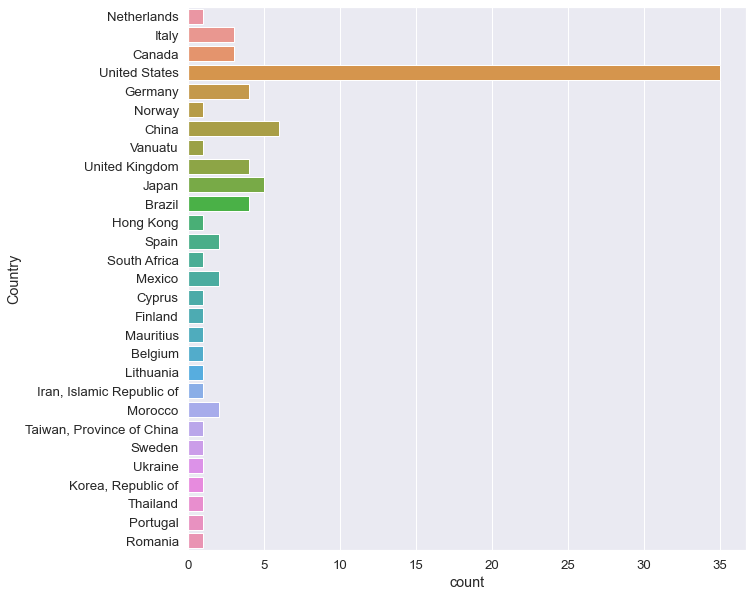

In [19]:
sns.countplot(y='Country', data=df)

# Great Work!